In [1]:
from snakemake.io import expand
import pandas as pd
import yaml
import pdb
import re
import numpy as np
import pyranges as pr
from utils import *

In [2]:
config_file = 'config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [6]:
ab = expand(config['data']['cerb']['agg_ab'], zip, species='human')[0]

In [7]:
df = pd.read_csv(ab, sep='\t')

In [8]:
df.head()

,annot_transcript_id,annot_transcript_name,Brain_Adult_ont_post-capture_human_all,Brain_Adult_ont_pre-capture_human_all,Brain_Adult_pacBioSII_post-capture_human_all,Brain_Adult_pacBioSII_pre-capture_human_all,Brain_Embryo_ont_post-capture_human_all,Brain_Embryo_ont_pre-capture_human_all,Brain_Embryo_pacBioSII_post-capture_human_all,Brain_Embryo_pacBioSII_pre-capture_human_all,...,TpoolA_Adult_pacBioSII_post-capture_human_all,TpoolA_Adult_pacBioSII_pre-capture_human_all,WBlood_Adult_ont_post-capture_human_all,WBlood_Adult_ont_pre-capture_human_all,WBlood_Adult_pacBioSII_post-capture_human_all,WBlood_Adult_pacBioSII_pre-capture_human_all,iPSC_Embryo_ont_post-capture_human_all,iPSC_Embryo_ont_pre-capture_human_all,iPSC_Embryo_pacBioSII_post-capture_human_all,iPSC_Embryo_pacBioSII_pre-capture_human_all
0,"ENSG00000000419[1,1,1]","DPM1[1,1,1]",19.850260,215.831746,NaN,3.118956,57.003758,16.847988,1.238302,60.951968,...,NaN,3.42041,18.492804,NaN,2.089932,20.71713,110.109636,14.057068,2.228944,NaN
1,"ENSG00000000419[1,22,1]","DPM1[1,22,1]",9.925130,16.602442,NaN,NaN,16.286788,58.967958,NaN,NaN,...,NaN,NaN,NaN,18.821214,NaN,NaN,47.189844,21.085602,NaN,NaN
2,"ENSG00000001084[12,15,1]","GCLC[12,15,1]",24.812825,124.518315,NaN,3.118956,97.720728,429.623694,NaN,36.017072,...,NaN,6.84082,NaN,37.642428,NaN,NaN,133.704558,337.369632,NaN,67.535262
3,ENSG00000001630ENSG00000285772.1ENSG0000028902...,ENSG00000001630ENSG00000285772.1ENSG0000028902...,29.775390,NaN,NaN,NaN,48.860364,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ENSG00000001630[1,1,9]","CYP51A1[1,1,9]",34.737955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.fillna(0)

In [12]:
df.annot_transcript_id.tolist()[:5]

['ENSG00000000419[1,1,1]',
 'ENSG00000000419[1,22,1]',
 'ENSG00000001084[12,15,1]',
 'ENSG00000001630ENSG00000285772.1ENSG00000289027.1[2,1,1]',
 'ENSG00000001630[1,1,9]']

In [13]:
# how many transcripts have multiple genes assigned to
df['gene_count'] = df.annot_transcript_id.str.count('ENSG')

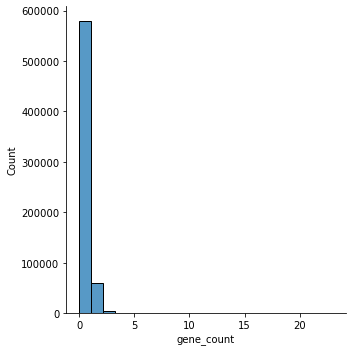

In [15]:
import seaborn as sns
sns.displot(data=df, x='gene_count')

In [16]:
print(len(df.loc[df.gene_count>1].index))
print(len(df.index))

64569
643737


In [17]:
64569/643737

0.10030338476738171

In [ ]:
# for each sample, need a list of transcripts that are expressed
tid_cols = ['annot_transcript_id', 'annot_transcript_name']